In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

In [6]:
group_1 = [
    'uv_eg', 'og', 'hauptluftung', 'gesamtmessung',
    'entsorgung', 'eg', 'xl106_druckmaschine'
    ]

### Kernel Composition

**Note**: Normalization of time range effects the period length hyperparams.
 - Solution? Normalize the range of period constraints

In [8]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.06, 0.12) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.16, 0.22) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

Iter 1 , Loss = 1.0059099951291992 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9653248651323102 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.9260497012100709 , Noise = 0.5982097387313843
Iter 4 , Loss = 0.8876999861869264 , Noise = 0.5543595552444458
Iter 5 , Loss = 0.8505988209195042 , Noise = 0.5129135251045227
Iter 6 , Loss = 0.8141525165973302 , Noise = 0.4738341271877289
Iter 7 , Loss = 0.777817129593177 , Noise = 0.4370773732662201
Iter 8 , Loss = 0.7418189309401666 , Noise = 0.4025912284851074
Iter 9 , Loss = 0.7063579803651105 , Noise = 0.37031644582748413
Iter 10 , Loss = 0.6714230559200113 , Noise = 0.3401879072189331
Iter 11 , Loss = 0.6373718311300169 , Noise = 0.31213465332984924
Iter 12 , Loss = 0.6042625429059957 , Noise = 0.28608131408691406
Iter 13 , Loss = 0.5720924002812092 , Noise = 0.2619481682777405
Iter 14 , Loss = 0.5413073835768686 , Noise = 0.239651620388031
Iter 15 , Loss = 0.511706631790187 , Noise = 0.21910583972930908
Iter 16 , Loss = 0.48348282953934

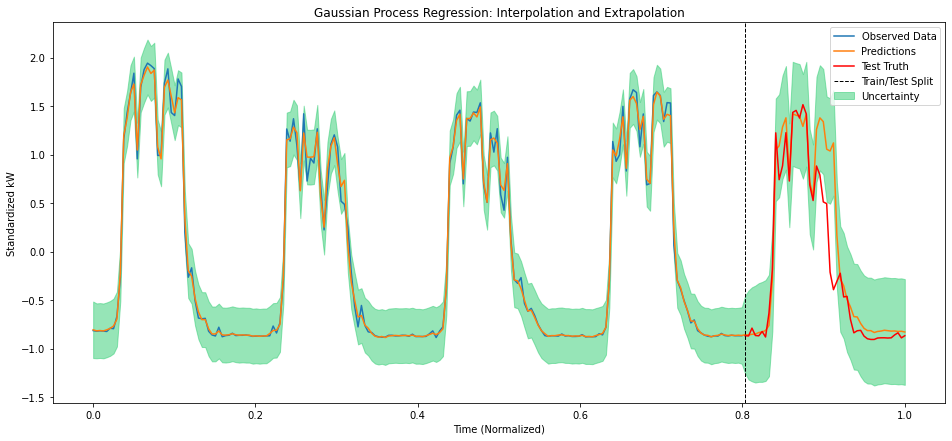

Iter 1 , Loss = 0.9785878572481033 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9437660513974443 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.9033404523474218 , Noise = 0.5982165932655334
Iter 4 , Loss = 0.8653864374641621 , Noise = 0.5543633699417114
Iter 5 , Loss = 0.827013371352557 , Noise = 0.5129079222679138
Iter 6 , Loss = 0.7860751776695446 , Noise = 0.473811537027359
Iter 7 , Loss = 0.7449092517464114 , Noise = 0.43701910972595215
Iter 8 , Loss = 0.7049307743260197 , Noise = 0.4024715721607208
Iter 9 , Loss = 0.6645544937725307 , Noise = 0.37010955810546875
Iter 10 , Loss = 0.6224911594554469 , Noise = 0.33986636996269226
Iter 11 , Loss = 0.5800502489596387 , Noise = 0.3116648197174072
Iter 12 , Loss = 0.5387238831591376 , Noise = 0.28542423248291016
Iter 13 , Loss = 0.4976093240883325 , Noise = 0.2610648274421692
Iter 14 , Loss = 0.4554859455713798 , Noise = 0.2385036200284958
Iter 15 , Loss = 0.4136303650562883 , Noise = 0.21765154600143433
Iter 16 , Loss = 0.373127979739

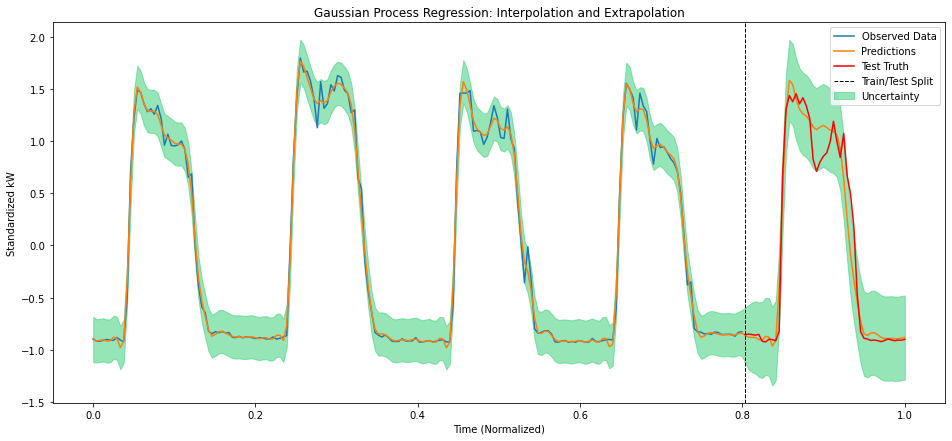

Iter 1 , Loss = 0.9346633445130409 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9054990586562148 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.8709692624471909 , Noise = 0.598238468170166
Iter 4 , Loss = 0.8400215892046452 , Noise = 0.5544267892837524
Iter 5 , Loss = 0.8094444093566387 , Noise = 0.513038158416748
Iter 6 , Loss = 0.7775809116956535 , Noise = 0.4740406274795532
Iter 7 , Loss = 0.7466152721935968 , Noise = 0.43738654255867004
Iter 8 , Loss = 0.717416086278967 , Noise = 0.40302684903144836
Iter 9 , Loss = 0.6882858205270389 , Noise = 0.3709110915660858
Iter 10 , Loss = 0.6587260390326106 , Noise = 0.34097421169281006
Iter 11 , Loss = 0.6298325258956913 , Noise = 0.3131355345249176
Iter 12 , Loss = 0.6018101163646237 , Noise = 0.28730785846710205
Iter 13 , Loss = 0.5734028181445573 , Noise = 0.2634009122848511
Iter 14 , Loss = 0.5448799817565204 , Noise = 0.24131858348846436
Iter 15 , Loss = 0.5180593544004544 , Noise = 0.22096379101276398
Iter 16 , Loss = 0.492242727981

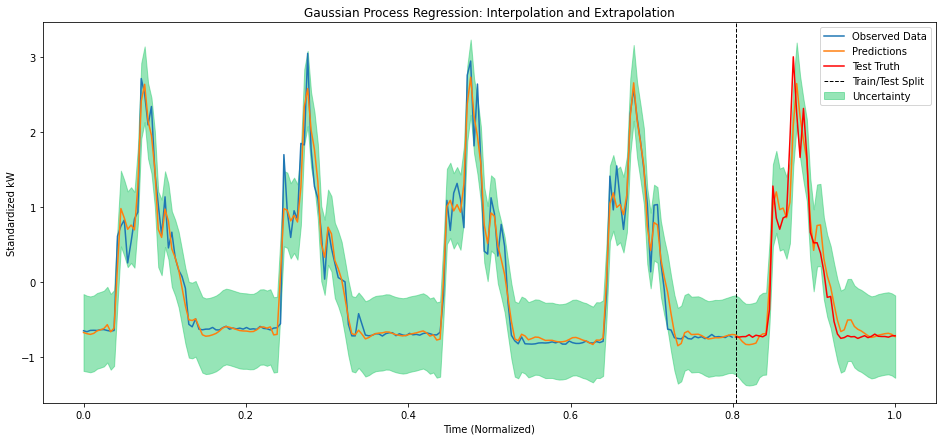

Iter 1 , Loss = 1.0022479430436437 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9681316185454184 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.9333047109692995 , Noise = 0.5982191562652588
Iter 4 , Loss = 0.8996215994620046 , Noise = 0.5543830394744873
Iter 5 , Loss = 0.8669921842542463 , Noise = 0.5129554867744446
Iter 6 , Loss = 0.8333881798245617 , Noise = 0.4738992750644684
Iter 7 , Loss = 0.7988663327030591 , Noise = 0.43716445565223694
Iter 8 , Loss = 0.7642224769933557 , Noise = 0.40269336104393005
Iter 9 , Loss = 0.7293273179903604 , Noise = 0.370424747467041
Iter 10 , Loss = 0.693967079043381 , Noise = 0.3402920067310333
Iter 11 , Loss = 0.6589845628558965 , Noise = 0.31222161650657654
Iter 12 , Loss = 0.6249677054115668 , Noise = 0.28613752126693726
Iter 13 , Loss = 0.5914538106615097 , Noise = 0.26196205615997314
Iter 14 , Loss = 0.5582863100886223 , Noise = 0.2396126538515091
Iter 15 , Loss = 0.5259585816625486 , Noise = 0.21900124847888947
Iter 16 , Loss = 0.49438303924

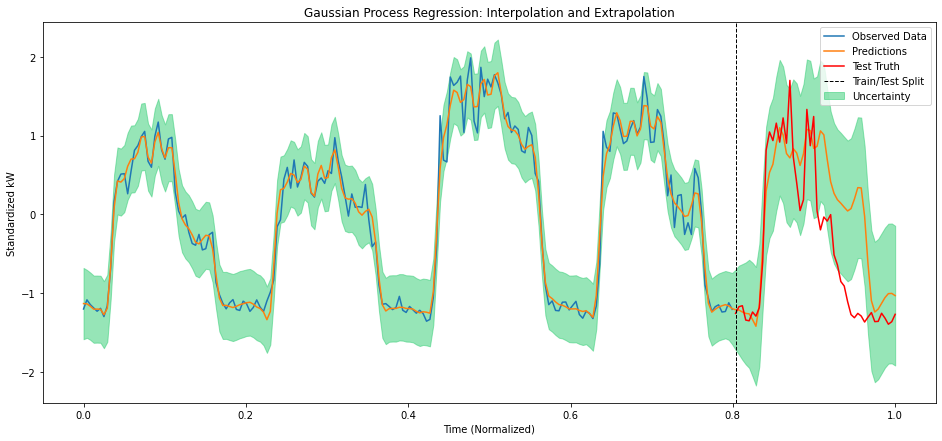

Iter 1 , Loss = 0.9397555555820469 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.902854237906917 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.8644370848628733 , Noise = 0.5982123017311096
Iter 4 , Loss = 0.8259435328641879 , Noise = 0.5543641448020935
Iter 5 , Loss = 0.7881168348782155 , Noise = 0.5129190683364868
Iter 6 , Loss = 0.7490690170571 , Noise = 0.4738394320011139
Iter 7 , Loss = 0.7091947517510427 , Noise = 0.43707406520843506
Iter 8 , Loss = 0.6698075984500022 , Noise = 0.40256258845329285
Iter 9 , Loss = 0.6309986506229841 , Noise = 0.3702417314052582
Iter 10 , Loss = 0.5915789614092167 , Noise = 0.34004509449005127
Iter 11 , Loss = 0.5516491035653313 , Noise = 0.31189900636672974
Iter 12 , Loss = 0.5123805888813705 , Noise = 0.2857237160205841
Iter 13 , Loss = 0.4741135097788083 , Noise = 0.2614378333091736
Iter 14 , Loss = 0.43581777436160213 , Noise = 0.2389581948518753
Iter 15 , Loss = 0.3975981884358167 , Noise = 0.2181965559720993
Iter 16 , Loss = 0.36053921550539

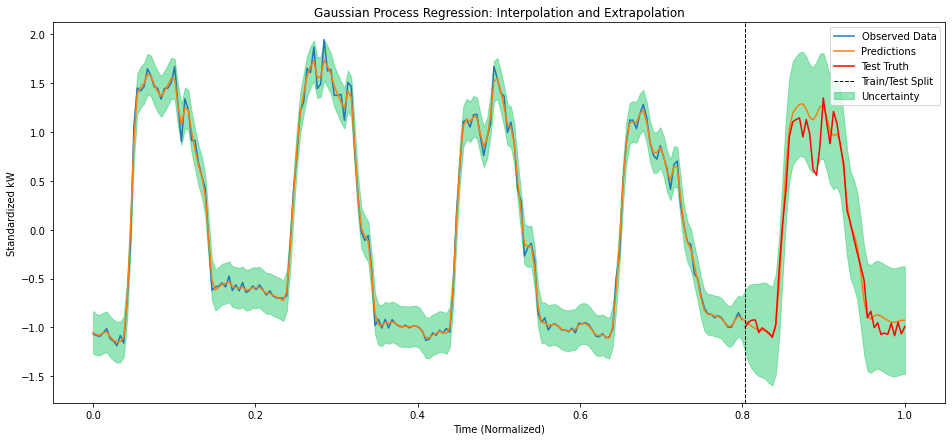

Iter 1 , Loss = 0.9124875353022137 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.8793274345995122 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.8412279756505413 , Noise = 0.5982229709625244
Iter 4 , Loss = 0.8058185774852215 , Noise = 0.5543886423110962
Iter 5 , Loss = 0.7706493836799155 , Noise = 0.5129647850990295
Iter 6 , Loss = 0.7339010162091132 , Noise = 0.4739135801792145
Iter 7 , Loss = 0.6974794780368918 , Noise = 0.4371839761734009
Iter 8 , Loss = 0.6624385748648968 , Noise = 0.40272071957588196
Iter 9 , Loss = 0.6277123579146732 , Noise = 0.3704661428928375
Iter 10 , Loss = 0.5925434309844119 , Noise = 0.3403542935848236
Iter 11 , Loss = 0.5577888201709231 , Noise = 0.31230881810188293
Iter 12 , Loss = 0.5243819188791855 , Noise = 0.28624850511550903
Iter 13 , Loss = 0.4916578030675387 , Noise = 0.2620913088321686
Iter 14 , Loss = 0.4587848347128272 , Noise = 0.23975205421447754
Iter 15 , Loss = 0.42668427779401896 , Noise = 0.21914058923721313
Iter 16 , Loss = 0.396014890

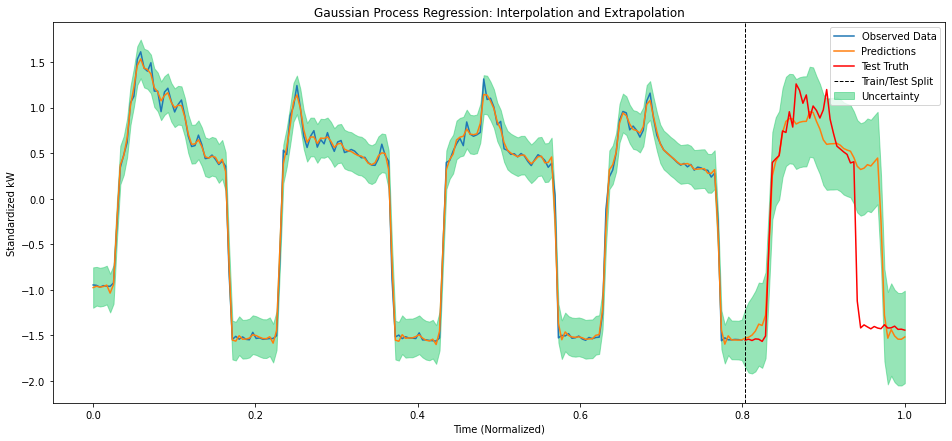

Iter 1 , Loss = 1.0960083190760024 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.0653600194441852 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.035461323734901 , Noise = 0.5982242226600647
Iter 4 , Loss = 1.0054613922789788 , Noise = 0.5544054508209229
Iter 5 , Loss = 0.9761579902702412 , Noise = 0.5130047798156738
Iter 6 , Loss = 0.947586642476666 , Noise = 0.4739839434623718
Iter 7 , Loss = 0.9195421406827641 , Noise = 0.43730032444000244
Iter 8 , Loss = 0.8921865283823145 , Noise = 0.4029074013233185
Iter 9 , Loss = 0.8646886584227905 , Noise = 0.37075990438461304
Iter 10 , Loss = 0.8380150463994923 , Noise = 0.34080439805984497
Iter 11 , Loss = 0.8134116212978636 , Noise = 0.3129834234714508
Iter 12 , Loss = 0.791005447286424 , Noise = 0.287241131067276
Iter 13 , Loss = 0.7702078746014479 , Noise = 0.26351821422576904
Iter 14 , Loss = 0.7514193434912319 , Noise = 0.24174469709396362
Iter 15 , Loss = 0.735691815548464 , Noise = 0.22184571623802185
Iter 16 , Loss = 0.72201692752491

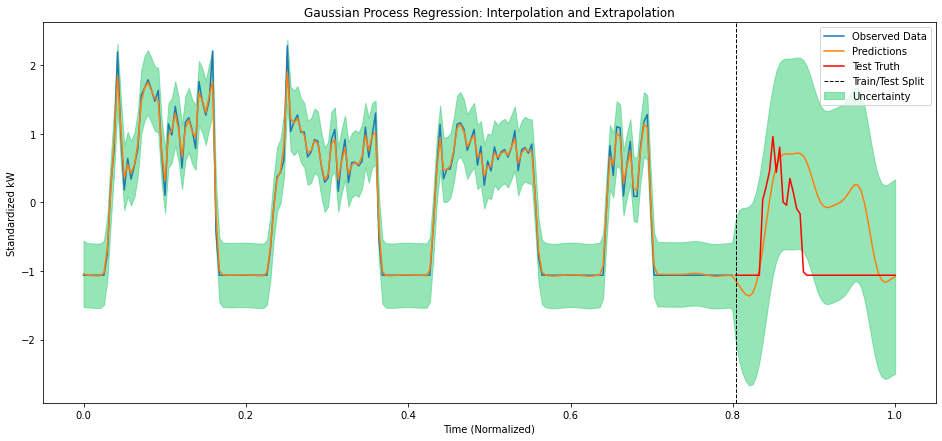

In [10]:
for machine in group_1:
    X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(machine+'_30T', 30, True)

    model, likelihood, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine=machine,
    update_score=True
    )   
